# Deep_Learning_from_Scratch_1 - part2

#### 딥러닝의 기본적인 내용을 정리하였습니다. 밑바닥부터 시작하는 딥러닝(사이토 고키 지음)을 참고하였습니다. 

## 3. 신경망
#### - 가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습하는 능력은 신경망의 중요한 성질이다.

### 3.1 퍼셉트론에서 신경망으로 
#### 3.1.1 신경망의 예
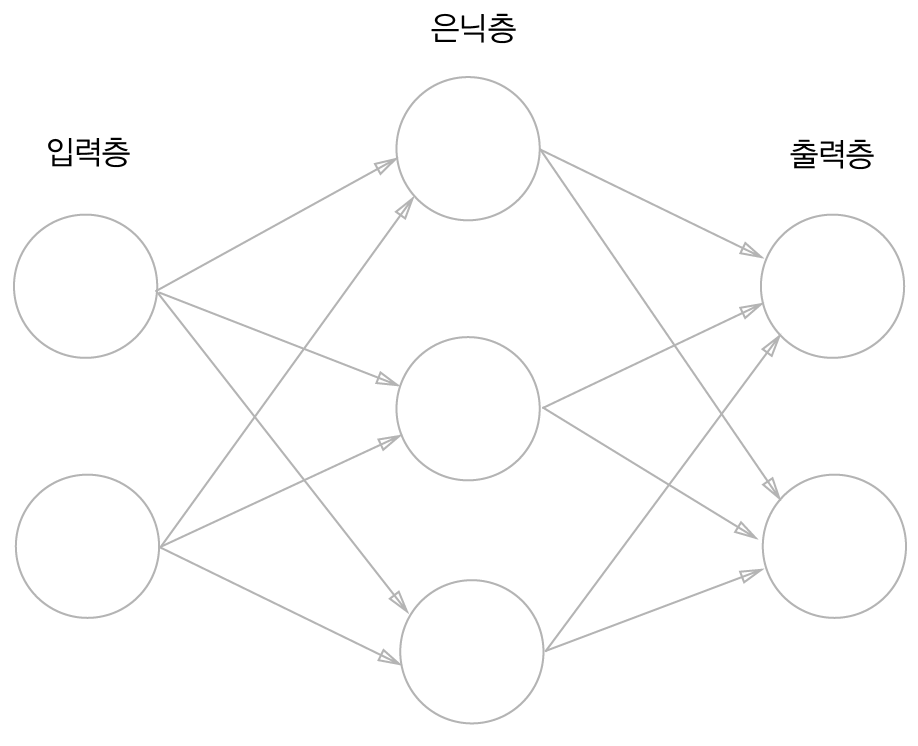
#### 3.1.2 퍼셉트론 복습
#### - 편향 : 뉴런이 얼마나 쉽게 활성화 되느냐를 제어 
#### - 가중치 : 각 신호의 영향력을 제어
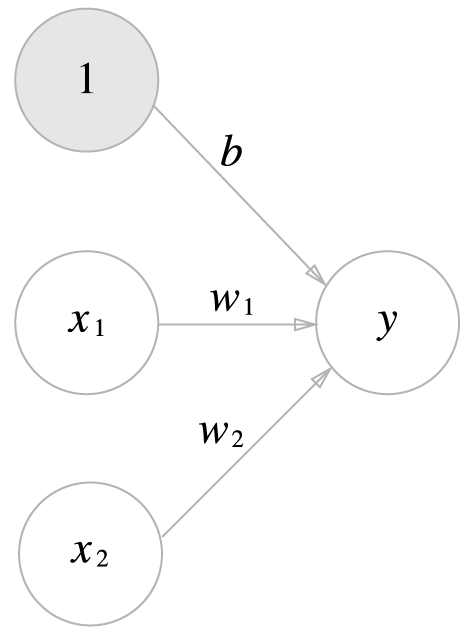
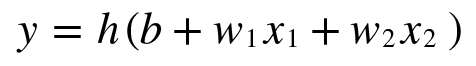
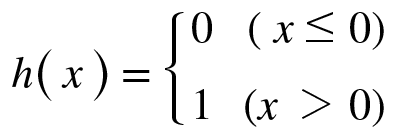
#### 3.1.3 활성화 함수의 등장 
#### - 입력 신호의 총합을 출력 신호로 변환하는 함수를 활성화 함수라고 한다. 
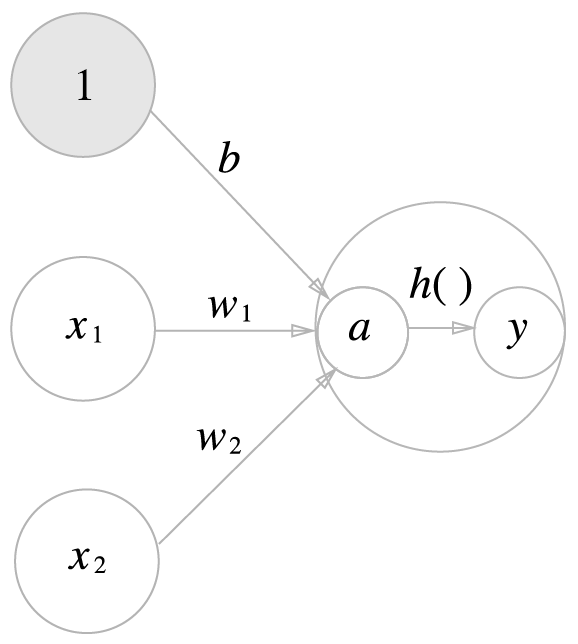
### 3.2 활성화 함수 
#### - 계단 함수 : 임게값을 경계로 출력이 변화
#### 3.2.1 시그모이드 함수 
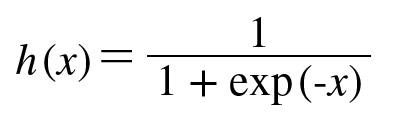
#### 3.2.2 계단 함수 구현하기

In [1]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

import numpy as np
def step_function_np(x):
    y = x > 0
    return y.astype(np.int)

In [4]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
print(x)
y = x >0
print(y)
print(y.astype(np.int))

[-1.  1.  2.]
[False  True  True]
[0 1 1]


/Users/qook/Python/3.7/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


#### 3.2.3 계단 함수의 그래프

/Users/qook/Python/3.7/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


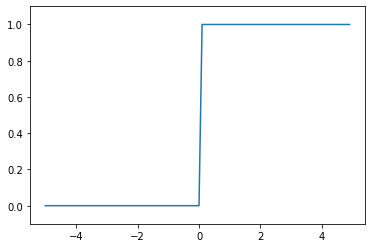

In [5]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype = np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

#### 3.2.4 시그모이드 함수 구현하기

In [6]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

x = np.array([-1.0, 1.0, 2.0])
print(sigmoid(x))

[0.26894142 0.73105858 0.88079708]


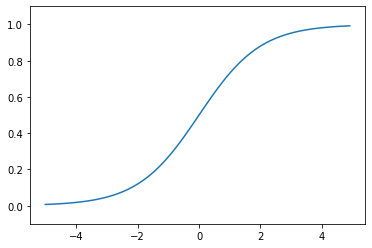

In [7]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

#### 3.2.6 비선형 함수
#### - 선형 함수를 이용하면 신경망의 층을 깊게 하는 의미가 없어진다. 
#### - 층을 쌓는 혜택을 얻고 싶으면 활성화 함수로는 반드시 비선형 함수를 사용해야 한다.

#### 3.2.7 ReLU 함수
#### - ReLU는 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하면 0을 출력한다.
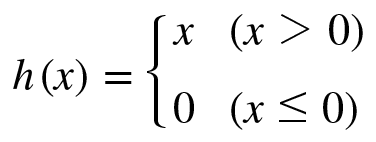

In [8]:
def relu(x):
    return np.maximum(0, x)

### 3.3 다차원 배열의 계산
#### 3.3.1 다차원 배열

In [10]:
import numpy as np
A = np.array([1,2,3,4])
print(A)
print(np.ndim(A)) # 배열의 차원 수
print(A.shape) # 배열의 형상
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


In [11]:
B = np.array([[1,2], [3,4], [5,6]])
print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


#### 3.3.2 행렬의 곱

In [12]:
A = np.array([[1,2], [3,4]])
print(A.shape)

B = np.array([[5,6], [7,8]])
print(B.shape)

print(np.dot(A, B))

(2, 2)
(2, 2)
[[19 22]
 [43 50]]


In [13]:
A = np.array([[1,2,3], [4,5,6]])
print(A.shape)

B = np.array([[1,2], [3,4], [5,6]])
print(B.shape)

print(np.dot(A, B))

(2, 3)
(3, 2)
[[22 28]
 [49 64]]


In [15]:
A = np.array([[1,2], [3,4], [5,6]])
print(A.shape)

B = np.array([7,8])
print(B.shape)

print(np.dot(A, B))

(3, 2)
(2,)
[23 53 83]


#### 3.3.3 신경망에서의 행렬 곱

In [16]:
X = np.array([1,2])
print(X.shape)

W = np.array([[1,3,5], [2,4,6]])
print(W)
print(W.shape)

Y = np.dot(X, W)
print(Y)

(2,)
[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]


### 3.4 3층 신경망 구현하기
#### 3.4.1 표기법 설명
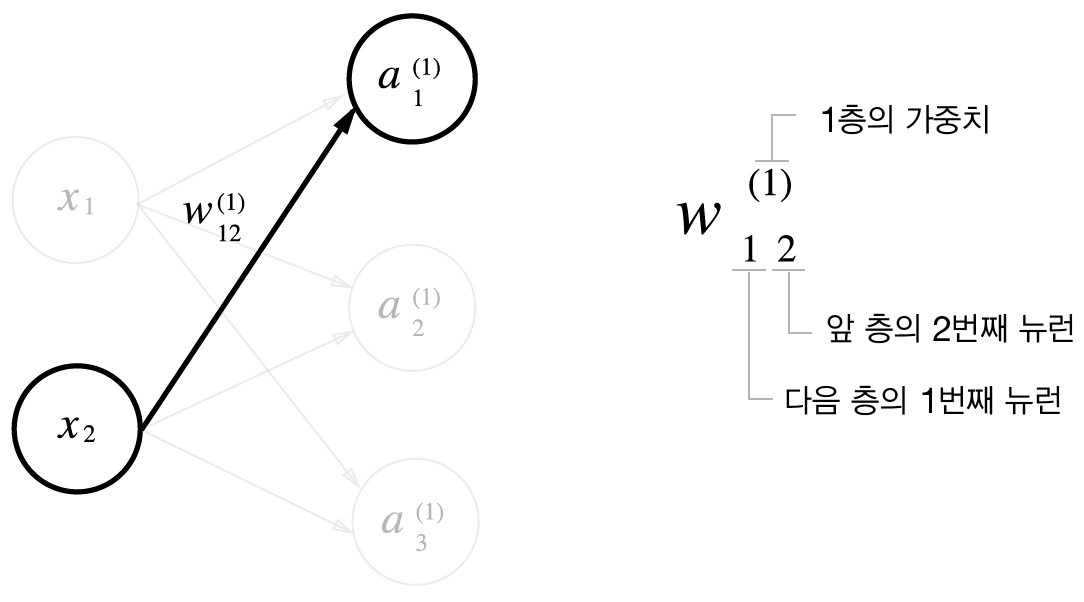
#### 3.4.2 각 층의 신호 전달 구현하기
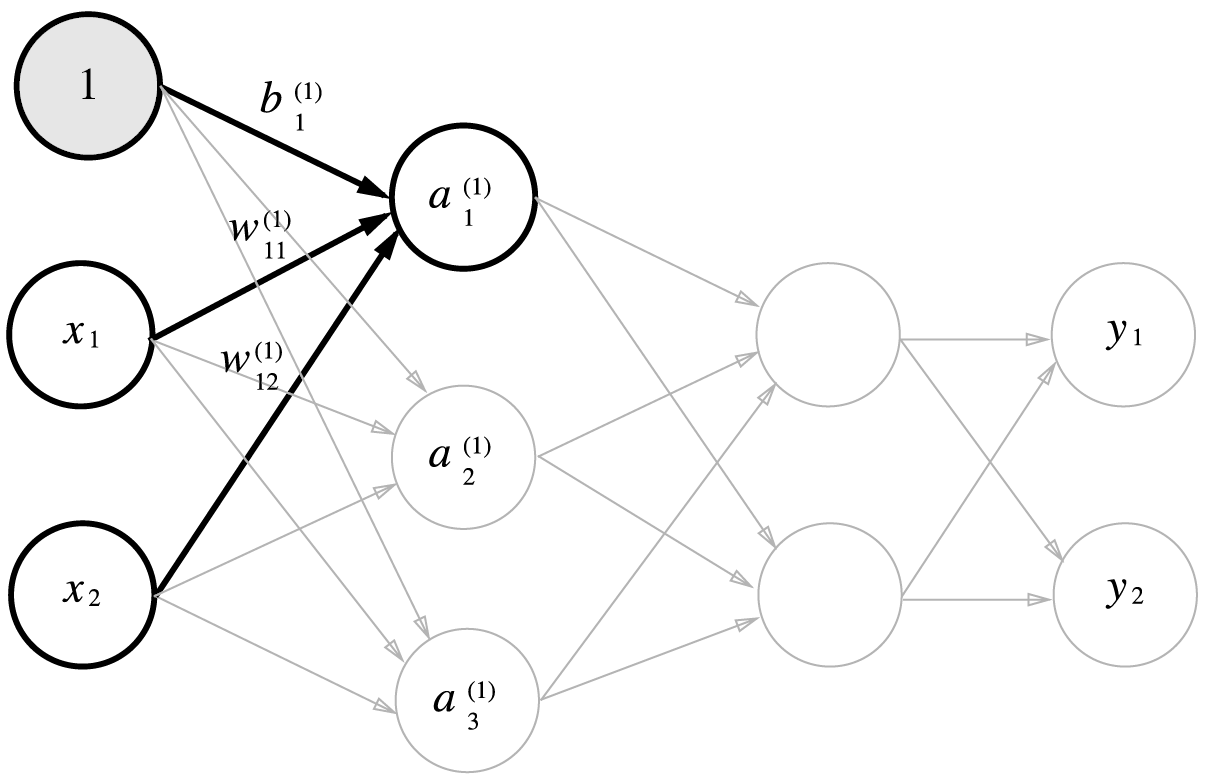
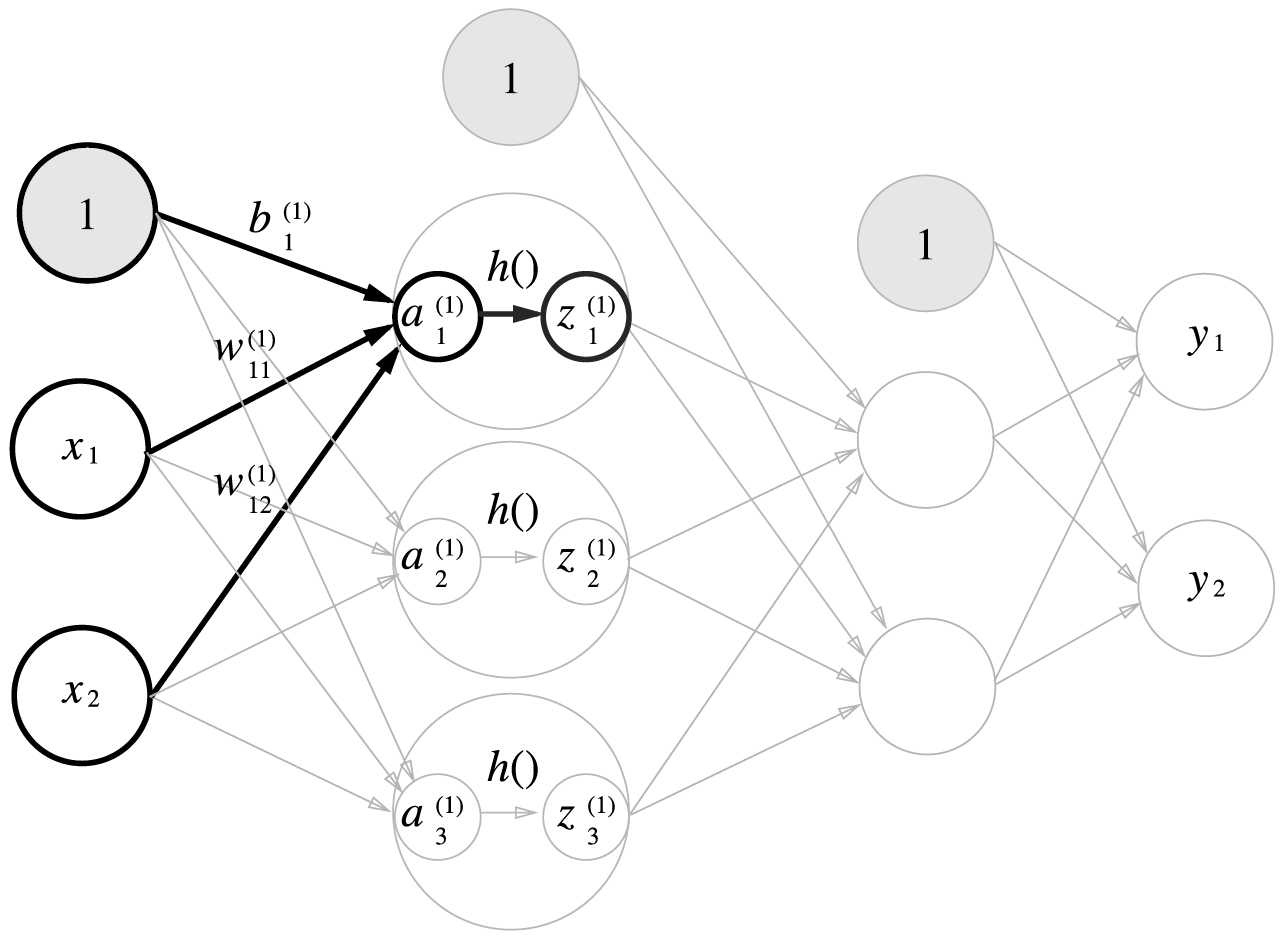
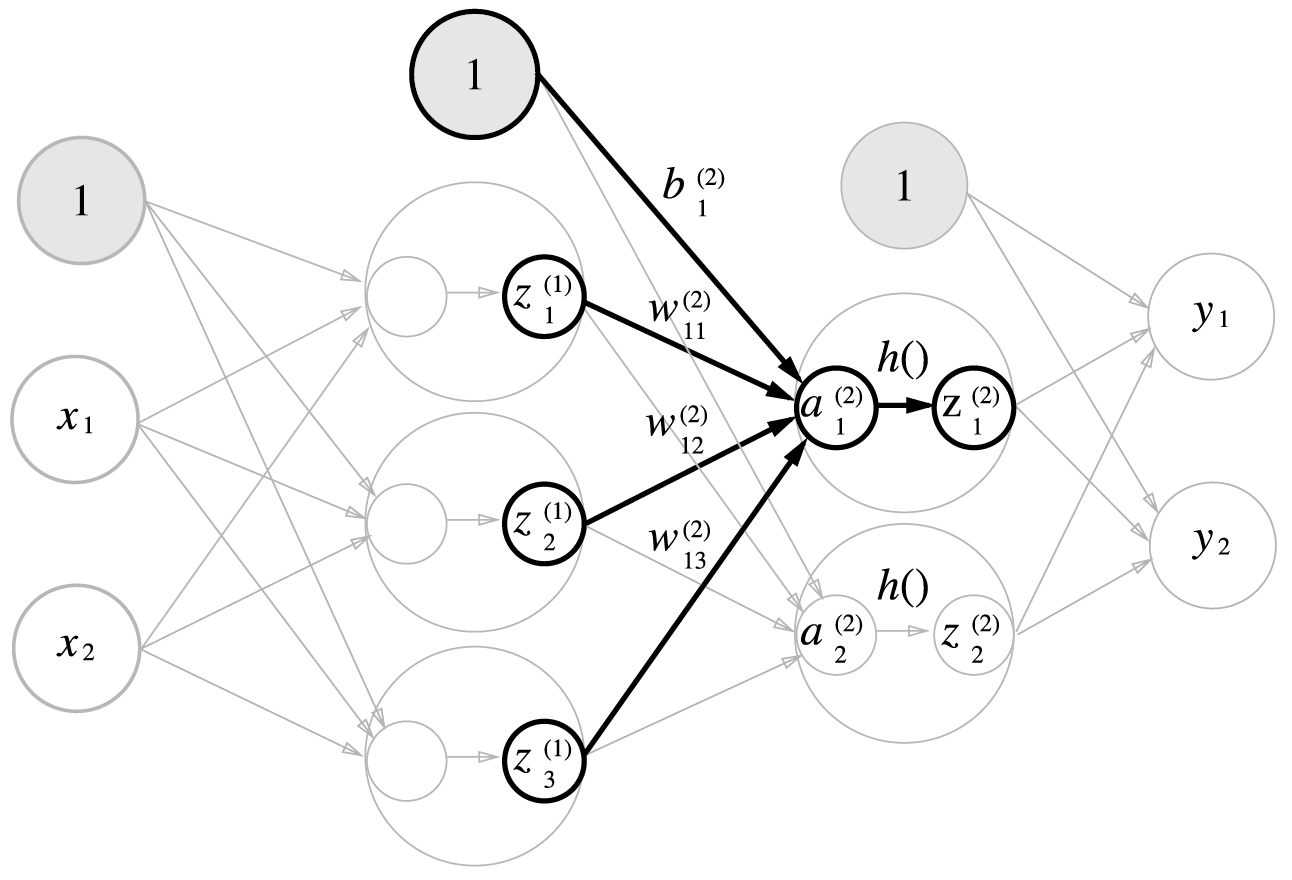
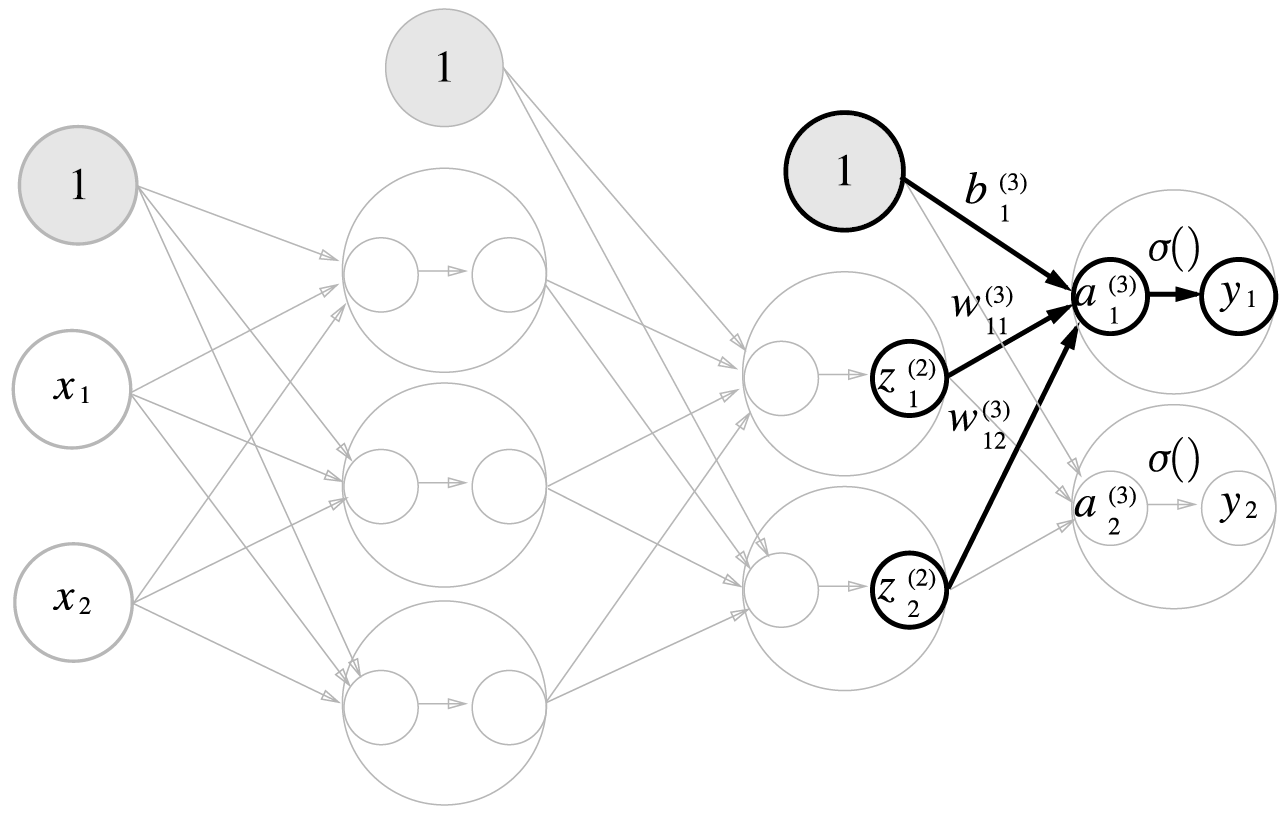

In [20]:
X = np.array([1.0, 5.0])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(X.shape)
print(W1.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)
print(A1)
print(Z1)

W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(2,)
(2, 3)
(3,)
[1.2 2.5 3.8]
[0.76852478 0.92414182 0.97811873]
(3,)
(3, 2)
(2,)


In [21]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1 , 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

#### 3.4.3 구현 정리

In [23]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['B1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['B2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['B3'] = np.array([0.1 , 0.2])
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['B1'], network['B2'], network['B3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)

print(y)


[0.31682708 0.69627909]


### 3.5 출력층 설계하기
#### - 회귀에는 항등 함수를, 분류에는 소프트맥스 함수를 활성화 함수로 사용한다.

#### 3.5.1 항등 함수와 소프트맥스 함수 구현하기
#### 항등 함수 : 입력 그대로를 출력, 입력 = 출력
#### 소프트맥스 함수 : 출력층의 각 뉴런이 모든 입력 신호에서 영향을 받음
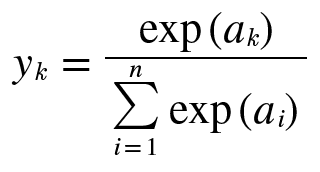

In [26]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [28]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

#### 3.5.2 소프트맥스 함수 구현 시 주의점
#### - 오버플로 : 컴퓨터가 표현할 수 있는 범위의 값을 넘어서는 문제
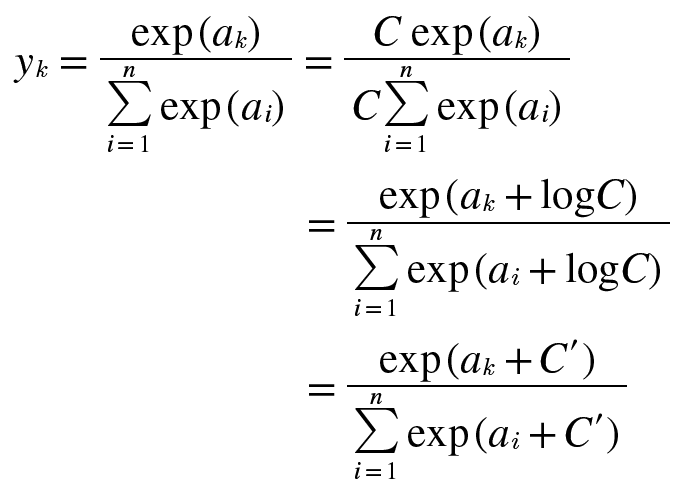

In [30]:
a = np.array([1010, 1000, 990])
print(np.exp(a) / np.sum(np.exp(a)))

c = np.max(a)
print(a -c)

print(np.exp(a-c) / np.sum(np.exp(a-c)))

[nan nan nan]
[  0 -10 -20]
[9.99954600e-01 4.53978686e-05 2.06106005e-09]


/Users/qook/Python/3.7/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/Users/qook/Python/3.7/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [ ]:
def softmax_without_overflow(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

#### 3.5.3 소프트맥스 함수의 특징
#### - 출력의 총합이 1이되어 함수의 출력을 '확률'로 해석할 수 있다. 
#### - 따라서 문제를 확률적(통계적)으로 대응 할 수 있다.
#### - 신경망을 이용한 분류에서는 가장 큰 출력을 내는 뉴련에 해당하는 클래스로 인식한다. 소프트맥스 함수를 적용해도 출력이 가장 큰 뉴런의 위치는 달라지지 않기 때문에 신경망에서 분류를 할 때는 출력층의 소프트맥스 함수는 생략해도 된다. 지수함수의 계산 자원 낭비를 막기 위해 생략을 자주 한다.

In [33]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


#### 3.5.4 출력층의 뉴런 수 정하기 
#### - 분류에서는 분류하고 싶은 클래스 수로 설정하는 것이 일반적

### 3.6 손글자 숫자 인식
#### - 생략